# Introduction
Udemy is a Massive Online Open Course website, where you can purchase certified courses to learn from a wide range of topics. As of Jan 2020, the platform has more than 50 million students and 57,000 instructors teaching courses in over 65 languages. There have been over 295 million course enrollments. Students and instructors come from 190+ countries and 2/3 of students are located outside of the U.S. Udemy also has over 5,000 enterprise customers and 80% of Fortune 100 companies use Udemy for employee upskilling.


# Problem Statement

* We have a sample dataset with various courses subscription information.

* Task is to Explore various courses, understand subscribers' interest & get some insights from the data which would help Udemy content creators to improve their Courses 

# Data 

* This dataset contains 3682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy. 


* course_id -     ID

* course_title - Title of the course.

* url  -          Course URL

* is_paid-        Is it a paid course or not.

* price-          Price of the course

* num_subscribers-Amount of students subscribed to the course

* num_reviews-    Number of reviews.

* num_lectures-   Lectures per course

* level-          Course diffculty

* content_duration-Duration of all course materials in hours

* subject-         Subject of the course

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc

# Loading the Data

In [2]:
dataset=pd.read_csv("udemy_courses.csv")

In [3]:
dataset.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,Business Finance


# Preparing the Data 

In [4]:
#Drop unnecessary columns
dataset.drop(['course_id','url'],axis=1,inplace=True)

In [5]:
#Check for missing values 
dataset.info()#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   course_title      3683 non-null   object
 1   is_paid           3683 non-null   object
 2   price             3683 non-null   object
 3   num_subscribers   3683 non-null   int64 
 4   num_reviews       3683 non-null   int64 
 5   num_lectures      3683 non-null   int64 
 6   level             3683 non-null   object
 7   content_duration  3683 non-null   object
 8   subject           3683 non-null   object
dtypes: int64(3), object(6)
memory usage: 259.1+ KB


In [6]:
dataset.is_paid.value_counts()

True                                           2738
TRUE                                            634
False                                           264
FALSE                                            46
https://www.udemy.com/learnguitartoworship/       1
Name: is_paid, dtype: int64

##### One course has invalid value for is_paid, also trues & falses needs to be put in one category

In [7]:
dataset['is_paid'].replace({'True':'TRUE','False':'FALSE'},inplace=True)
dataset['is_paid'].replace({'https://www.udemy.com/learnguitartoworship/':'FALSE'},inplace=True)
dataset.is_paid.unique()

array(['TRUE', 'FALSE'], dtype=object)

#### Let's set the price variable value as 0 for Free courses for uniformity

In [8]:
dataset['price'].replace({'Free':0,'TRUE':0},inplace=True)

In [9]:
dataset['price']=dataset['price'].astype('int64')

In [10]:
dataset['level'].unique()#Again, one invalid data in level

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', '52'], dtype=object)

In [11]:
dataset['level'].replace({'52':'Beginner Level'},inplace=True)
dataset['content_duration'].replace({'Beginner Level':'52'},inplace=True)

In [12]:
dataset.iloc[2066:2067,:]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
2066,Learn Classical Guitar Technique and play 'Spa...,FALSE,0,30,1463,29,Beginner Level,52,Musical Instruments


*Looks good!*

# Exploratory Data Analysis

In [13]:
dataset['subject'].value_counts()#total courses available of each subject 

Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: subject, dtype: int64

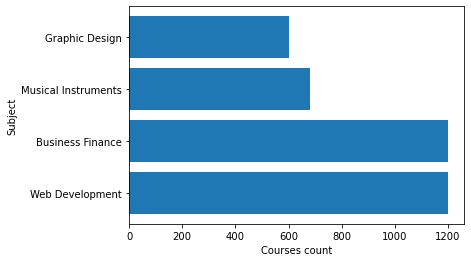

In [14]:
plt.barh(dataset['subject'].value_counts().index,dataset['subject'].value_counts())
plt.ylabel("Subject")
plt.xlabel("Courses count")
plt.show()

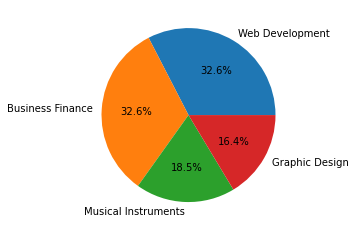

In [15]:
plt.pie(dataset['subject'].value_counts(),labels=dataset['subject'].value_counts().index,autopct="%.1f%%")
plt.show()

### Equal no. of web development & business finance courses available.
WEB DEVELOPMENT = BUSINESS FINANCE > MUSICAL > GRAPHIC DESIGNS

In [16]:
subjectwise_subscriber=dataset.groupby('subject').sum()['num_subscribers']

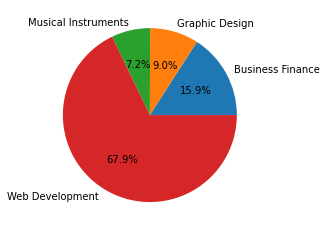

In [17]:
plt.pie(subjectwise_subscriber,labels=subjectwise_subscriber.index,autopct="%.1f%%",)
plt.show()

###  Key Observations
1. Web development is most demanding course as it is taken up by about 68% of population across countries.
2. Even though there are 1199 courses available of business finance, only about 16% of population is interested.
3. Graphic design is enrolled more as compared to musical instruments.


In [18]:
top5_subs=dataset.sort_values('num_subscribers',ascending=False).head(5)#top 5 courses taken
top5_subs

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
2832,Learn HTML5 Programming From Scratch,FALSE,0,268923,8629,45,All Levels,10.5 hours,Web Development
3037,Coding for Entrepreneurs Basic,FALSE,0,161029,279,27,Beginner Level,3.5 hours,Web Development
3235,The Web Developer Bootcamp,TRUE,200,121584,27445,342,All Levels,43 hours,Web Development
2788,Build Your First Website in 1 Week with HTML5 ...,FALSE,0,120291,5924,30,Beginner Level,3 hours,Web Development
3237,The Complete Web Developer Course 2.0,TRUE,200,114512,22412,304,All Levels,30.5 hours,Web Development


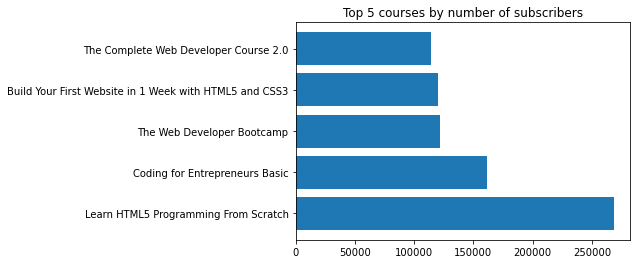

In [19]:
plt.barh(top5_subs.course_title, top5_subs.num_subscribers)


plt.title("Top 5 courses by number of subscribers")
plt.show()


In [20]:
top5_reviewed=dataset.sort_values('num_reviews',ascending=False).head(5)#top reviewed courses
top5_reviewed

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
3235,The Web Developer Bootcamp,TRUE,200,121584,27445,342,All Levels,43 hours,Web Development
3237,The Complete Web Developer Course 2.0,TRUE,200,114512,22412,304,All Levels,30.5 hours,Web Development
3209,Angular 4 (formerly Angular 2) - The Complete ...,TRUE,190,73783,19649,329,All Levels,22 hours,Web Development
3252,JavaScript: Understanding the Weird Parts,TRUE,175,79612,16976,85,All Levels,11.5 hours,Web Development
3259,Modern React with Redux,TRUE,180,50815,15117,150,All Levels,26.5 hours,Web Development


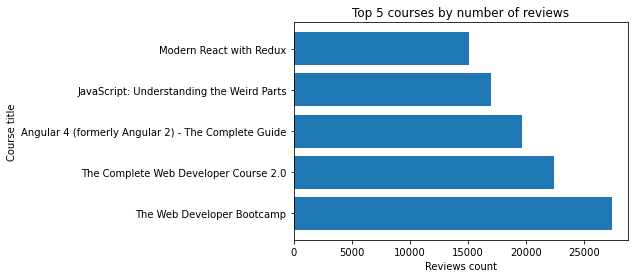

In [21]:
plt.barh(top5_reviewed.course_title, top5_reviewed.num_reviews)
plt.xlabel("Reviews count")
plt.ylabel("Course title")
plt.title("Top 5 courses by number of reviews")
plt.show()


#### All the top 5 courses by subscribers & reviews are Web Development courses: of either all/beginner level

### Understanding is_paid & course level with no. of subscribers

In [22]:
dataset['is_paid'].value_counts()

TRUE     3372
FALSE     311
Name: is_paid, dtype: int64

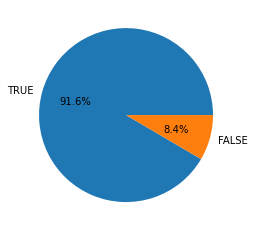

In [23]:
plt.pie(dataset['is_paid'].value_counts(),labels=dataset['is_paid'].value_counts().index,autopct="%.1f%%")
plt.show()#8.4% free courses are available

In [24]:
paidcount=dataset.groupby('is_paid').sum()['num_subscribers']
paidcount

is_paid
FALSE    3575555
TRUE     8185631
Name: num_subscribers, dtype: int64

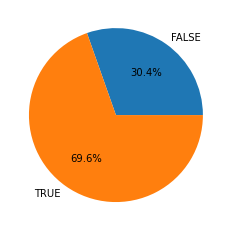

In [25]:
plt.pie(paidcount.values,labels=paidcount.index,autopct="%.1f%%")
plt.show()

### About 30% of poulation go for free courses

In [26]:
dataset.groupby(['subject','level']).sum()['num_subscribers']

subject              level             
Business Finance     All Levels            1048244
                     Beginner Level         648007
                     Expert Level            30146
                     Intermediate Level     144350
Graphic Design       All Levels             688332
                     Beginner Level         315757
                     Expert Level             1008
                     Intermediate Level      58051
Musical Instruments  All Levels             328170
                     Beginner Level         429060
                     Expert Level             5431
                     Intermediate Level      84058
Web Development      All Levels            4851366
                     Beginner Level        2660049
                     Expert Level            13611
                     Intermediate Level     455546
Name: num_subscribers, dtype: int64

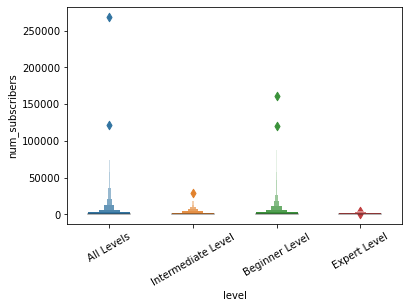

In [27]:
chart=sns.boxenplot(data=dataset,x='level',y='num_subscribers',width=0.5)
chart.set_xticklabels(chart.get_xticklabels(),rotation=30)
plt.show()

#### Among all courses, expert level courses are least taken
Why is that?


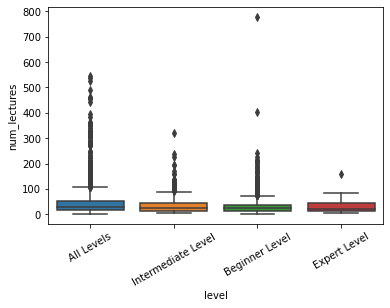

In [28]:
chart2=sns.boxplot(data=dataset,x='level',y='num_lectures')
chart2.set_xticklabels(chart.get_xticklabels(),rotation=30)
plt.show()

#### It is significant that expert level courses have very less no. of lectures.
1. Let's say that it will not be having any summary of basics/crash course which is why it is least taken.

 

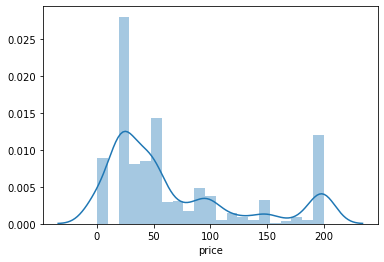

In [29]:
#Price Distribution
sns.distplot(dataset.price)

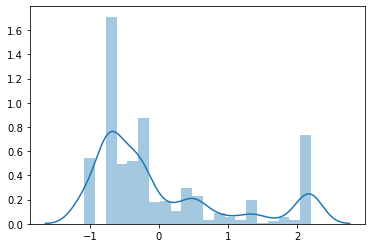

In [30]:
#Standardized distribution plot for price
sns.distplot(sc.zscore(dataset.price))

In [31]:
dataset['price'].describe()

count    3683.000000
mean       65.992398
std        60.985586
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

#### More courses available are in 20-95 price range.


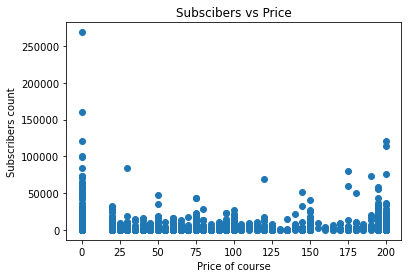

In [32]:
plt.scatter(dataset.price,dataset.num_subscribers)
plt.xlabel("Price of course")
plt.ylabel("Subscribers count")
plt.title("Subscibers vs Price")
plt.show()

In [33]:
dataset[dataset['is_paid']=="FALSE"].sort_values('num_subscribers',ascending=False).head(6)#top 6 free courses

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
2832,Learn HTML5 Programming From Scratch,FALSE,0,268923,8629,45,All Levels,10.5 hours,Web Development
3037,Coding for Entrepreneurs Basic,FALSE,0,161029,279,27,Beginner Level,3.5 hours,Web Development
2788,Build Your First Website in 1 Week with HTML5 ...,FALSE,0,120291,5924,30,Beginner Level,3 hours,Web Development
1900,Free Beginner Electric Guitar Lessons,FALSE,0,101154,1042,95,Beginner Level,4.5 hours,Musical Instruments
2594,Web Design for Web Developers: Build Beautiful...,FALSE,0,98867,6512,20,All Levels,3 hours,Web Development
3294,Practical PHP: Master the Basics and Code Dyna...,FALSE,0,83737,4598,45,All Levels,6.5 hours,Web Development


### Few "free" web developments courses have good reach and "less course duration"
   Course title- "Learn HTML5 Programming From Scratch"


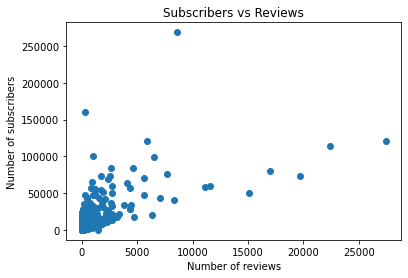

In [34]:
plt.scatter(dataset.num_reviews,dataset.num_subscribers)
plt.xlabel("Number of reviews")
plt.ylabel("Number of subscribers")
plt.title("Subscribers vs Reviews")
plt.show()

### More reviewed ~ More subscribers

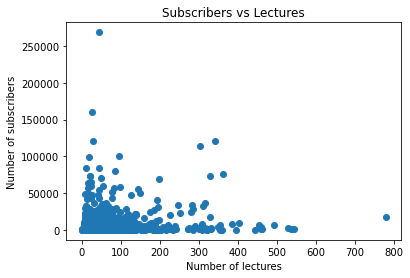

In [35]:
plt.scatter(dataset.num_lectures,dataset.num_subscribers)
plt.xlabel("Number of lectures")
plt.ylabel("Number of subscribers")
plt.title("Subscribers vs Lectures")
plt.show()

#### PRICE vs LEVEL & SUBJECT

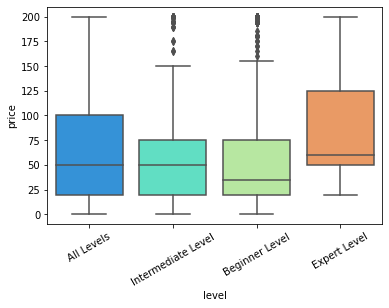

In [36]:
chart3=sns.boxplot(data=dataset,x='level',y='price',palette='rainbow')
chart3.set_xticklabels(chart.get_xticklabels(),rotation=30)
plt.show()

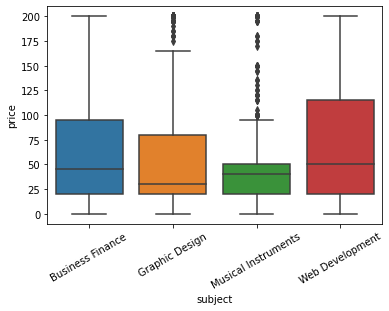

In [37]:
chart4=sns.boxplot(data=dataset,x='subject',y='price')
chart4.set_xticklabels(chart4.get_xticklabels(),rotation=30)
plt.show()

# SUMMARY
1. Equal no. of web development & business finance courses available.
2. Web development is most demanding course as it is taken up by about 68% of all subscribers across countries.
3. All the top 5 courses by subscribers & reviews are Web Development courses: of either all/beginner level.
4. About 30% of poulation go for free courses
5. Among all courses, expert level courses are least taken. 
    * It is significant that it is limited to experts take only as less lectures are there. 
    * One can take a all levels course in that case, as it is in cheaper price range.
6. More courses available are in 20-95 price range.
7. Few "free" web developments courses have good reach and "less course duration"
    ##Course title- "Learn HTML5 Programming From Scratch"- free | 10.5hrs "doing good"
8. More reviewed courses are fetching More subscribers. 


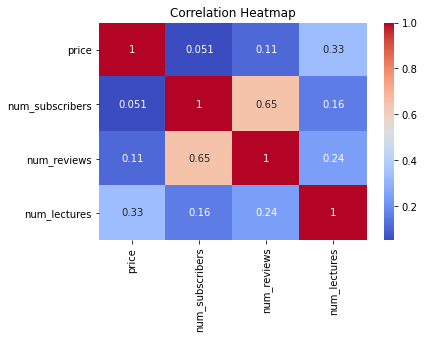

In [38]:
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Clearly, there exists somewhat high correlation between num_subscribers & num_reviews =0.65